In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


(16719, 16)

In [6]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [7]:
# Загальна статистика продажів
total_sales = df['Global_Sales'].sum()
average_sales = df['Global_Sales'].mean()
max_sales = df['Global_Sales'].max()
min_sales = df['Global_Sales'].min()

print("Загальні продажі:", total_sales)
print("Середні продажі:", average_sales)
print("Максимальні продажі:", max_sales)
print("Мінімальні продажі:", min_sales)

Загальні продажі: 8920.300000000001
Середні продажі: 0.5335426759973684
Максимальні продажі: 82.53
Мінімальні продажі: 0.01


NA_Sales       4402.62
EU_Sales       2424.67
JP_Sales       1297.43
Other_Sales     791.34
dtype: float64


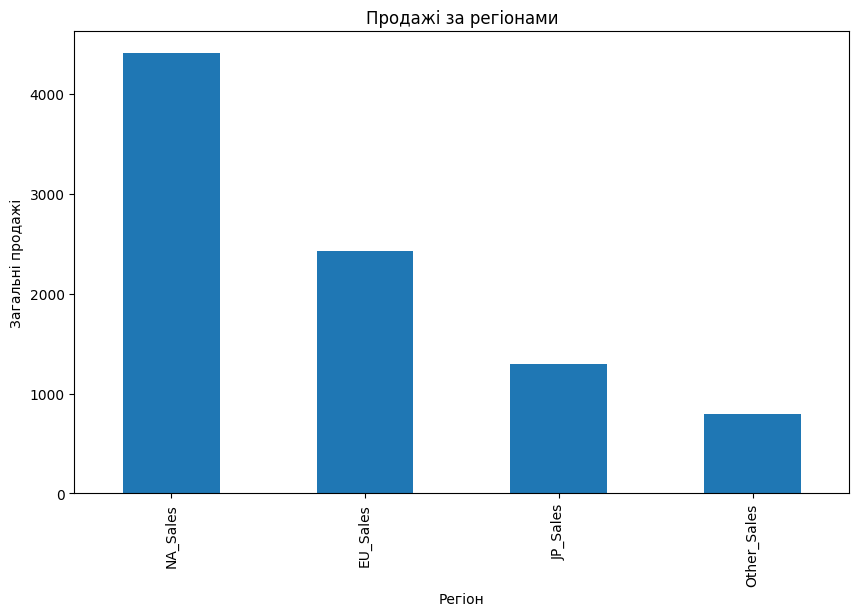

In [8]:
# Аналіз продажів за регіонами
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
region_total_sales = region_sales.sum()
print(region_total_sales)
region_total_sales.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Регіон')
plt.ylabel('Загальні продажі')
plt.title('Продажі за регіонами')
plt.show()

Platform
PS2     1255.64
X360     971.63
PS3      939.43
Wii      908.13
DS       807.10
Name: Global_Sales, dtype: float64


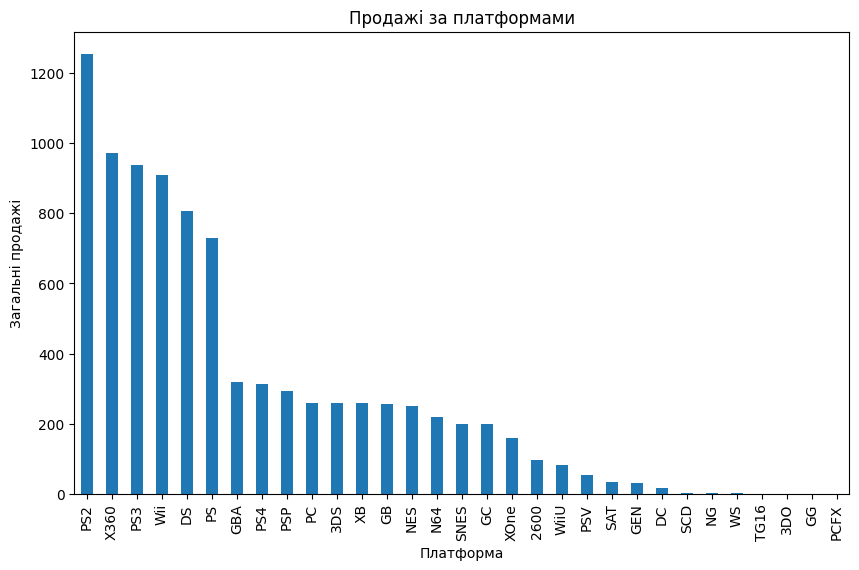

In [9]:
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
print(platform_sales.head(5))

platform_sales.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Платформа')
plt.ylabel('Загальні продажі')
plt.title('Продажі за платформами')
plt.show()

Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64


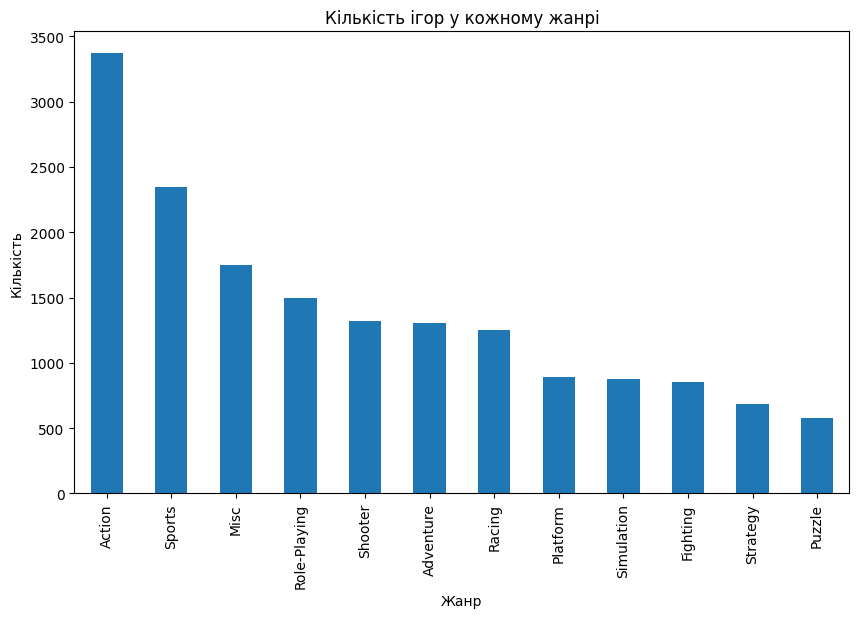

In [10]:
# Отримання кількості ігор у кожному жанрі
genre_counts = df['Genre'].value_counts()
print(genre_counts)

# Графік кількості ігор у кожному жанрі
genre_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Жанр')
plt.ylabel('Кількість')
plt.title('Кількість ігор у кожному жанрі')
plt.show()

Genre
Action     1205.65
Sports      835.62
Shooter     816.92
Name: Global_Sales, dtype: float64
Genre
Action     591.94
Sports     457.85
Shooter    448.87
Name: NA_Sales, dtype: float64
Genre
Action     388.81
Shooter    261.38
Sports     248.58
Name: EU_Sales, dtype: float64
Genre
Role-Playing    122.78
Action           76.63
Platform         43.09
Name: JP_Sales, dtype: float64
Genre
Action     147.74
Sports      94.29
Shooter     87.96
Name: Other_Sales, dtype: float64


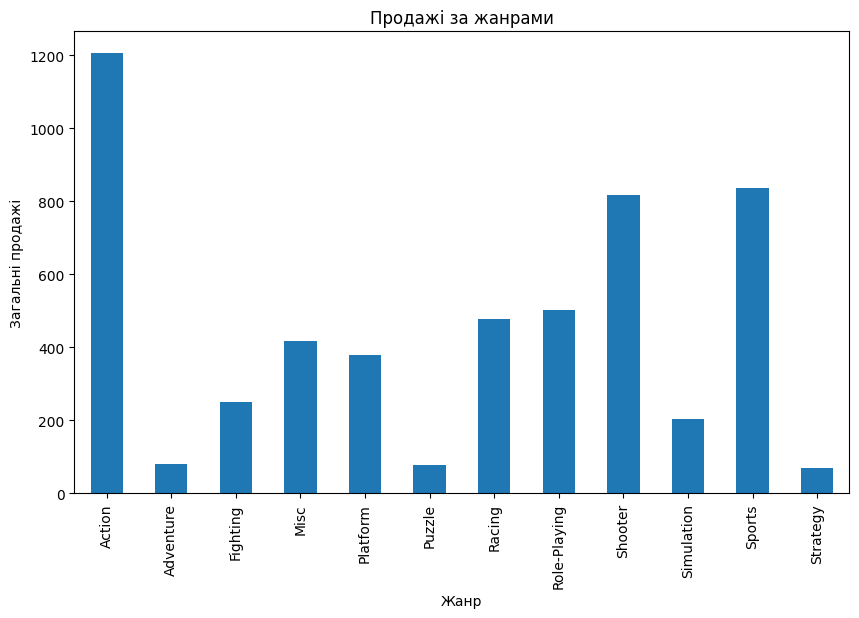

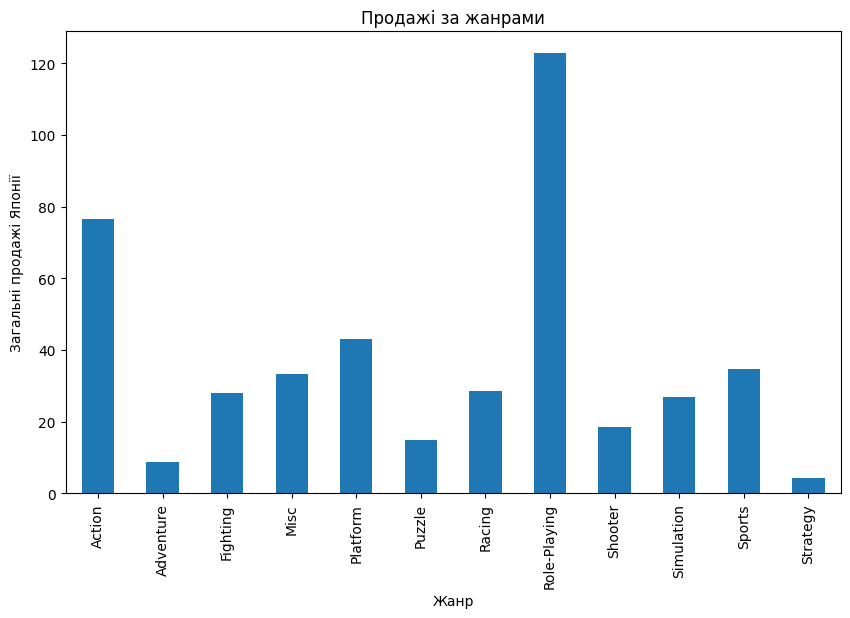

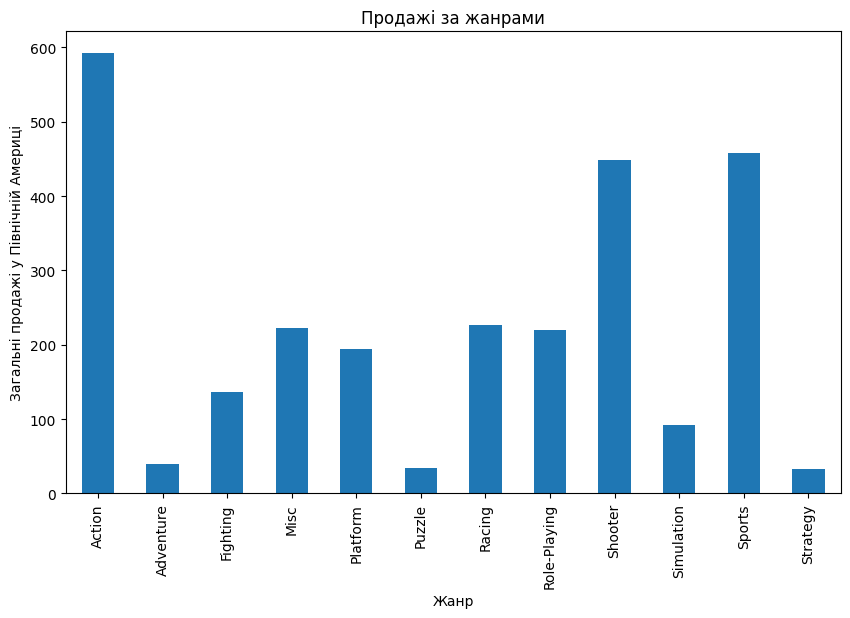

In [32]:
# Аналіз продажів за жанрами
genre_sales = df.groupby('Genre')['Global_Sales'].sum()
print(genre_sales.sort_values(ascending=False).head(3))

genre_sales_na = df.groupby('Genre')['NA_Sales'].sum()
print(genre_sales_na.sort_values(ascending=False).head(3))

genre_sales_eu = df.groupby('Genre')['EU_Sales'].sum()
print(genre_sales_eu.sort_values(ascending=False).head(3))

genre_sales_jp = df.groupby('Genre')['JP_Sales'].sum()
print(genre_sales_jp.sort_values(ascending=False).head(3))

genre_sales_oth = df.groupby('Genre')['Other_Sales'].sum()
print(genre_sales_oth.sort_values(ascending=False).head(3))

genre_sales.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Жанр')
plt.ylabel('Загальні продажі')
plt.title('Продажі за жанрами')
plt.show()

genre_sales_jp.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Жанр')
plt.ylabel('Загальні продажі Японії')
plt.title('Продажі за жанрами')
plt.show()
genre_sales_na.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Жанр')
plt.ylabel('Загальні продажі у Північній Америці')
plt.title('Продажі за жанрами')
plt.show()

Year_of_Release
1980.0     11.38
1981.0     35.77
1982.0     28.86
1983.0     16.79
1984.0     50.36
1985.0     53.94
1986.0     37.07
1987.0     21.74
1988.0     47.22
1989.0     73.45
1990.0     49.39
1991.0     32.23
1992.0     76.17
1993.0     48.40
1994.0     79.18
1995.0     88.11
1996.0    199.15
1997.0    200.98
1998.0    256.45
1999.0    251.25
2000.0    201.58
2001.0    331.47
2002.0    395.51
2003.0    357.80
2004.0    419.05
2005.0    458.31
2006.0    518.22
2007.0    605.37
2008.0    671.79
2009.0    658.88
2010.0    590.59
2011.0    507.79
2012.0    355.84
2013.0    361.24
2014.0    331.51
2015.0    268.05
2016.0    130.10
2017.0      0.06
2020.0      0.29
Name: Global_Sales, dtype: float64


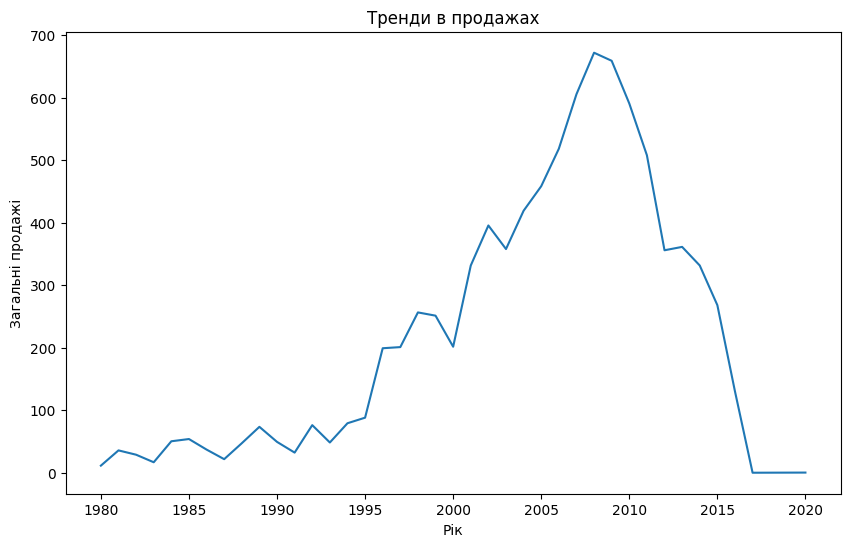

In [12]:
# Тренди в продажах
yearly_sales = df.groupby('Year_of_Release')['Global_Sales'].sum()
print(yearly_sales)

yearly_sales.plot(kind='line', figsize=(10, 6))
plt.xlabel('Рік')
plt.ylabel('Загальні продажі')
plt.title('Тренди в продажах')
plt.show()

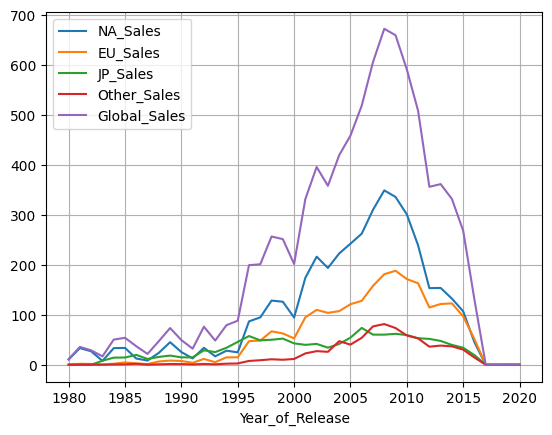

In [13]:
df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']].groupby('Year_of_Release').sum().plot(kind='line', grid=True);
plt.show();


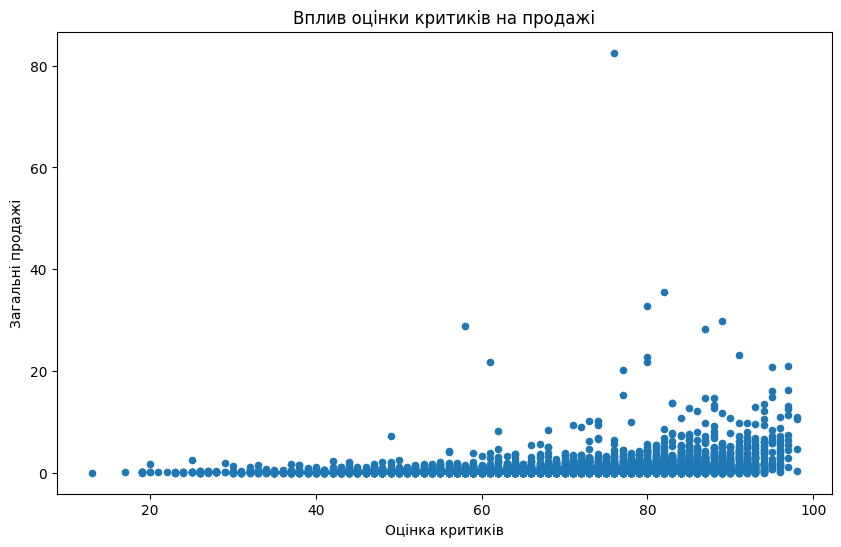

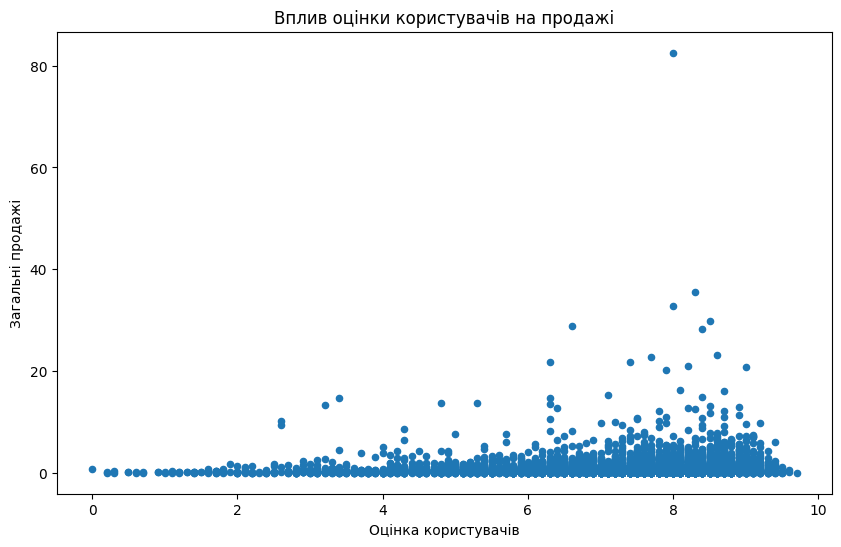

In [14]:
# Вплив оцінок критиків та користувачів на продажі
df.plot.scatter(x='Critic_Score', y='Global_Sales', figsize=(10, 6))
plt.xlabel('Оцінка критиків')
plt.ylabel('Загальні продажі')
plt.title('Вплив оцінки критиків на продажі')
plt.show()

# Перетворення стовпця 'User_Score' на числовий тип
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')

df.plot.scatter(x='User_Score', y='Global_Sales', figsize=(10, 6))
plt.xlabel('Оцінка користувачів')
plt.ylabel('Загальні продажі')
plt.title('Вплив оцінки користувачів на продажі')
plt.show()

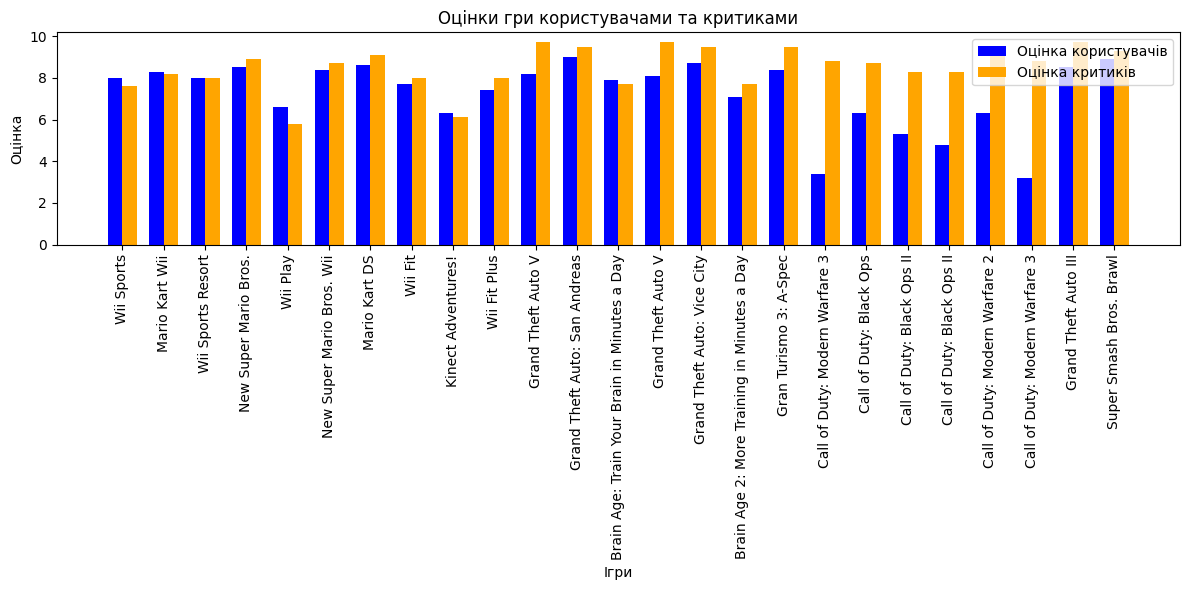

In [15]:

# Видалення ігор без оцінок користувачів
data = df.dropna(subset=['User_Score'])

# Видалення ігор без оцінок критиків
data = df.dropna(subset=['Critic_Score'])

# Створення списків з оцінками користувачів та критиків
user_scores = data['User_Score'].head(25)
critic_scores = data['Critic_Score'].head(25) / 10

# Створення списку ігор
games = data['Name'].head(25)

# Побудова стовпчастої діаграми
fig, ax = plt.subplots(figsize=(12, 6))
index = np.arange(len(games))
bar_width = 0.35

# Побудова стовпців для оцінок користувачів
rects1 = ax.bar(index, user_scores, bar_width, color='blue', label='Оцінка користувачів')

# Побудова стовпців для оцінок критиків
rects2 = ax.bar(index + bar_width, critic_scores, bar_width, color='orange', label='Оцінка критиків')

# Налаштування осей та підписів
ax.set_xlabel('Ігри')
ax.set_ylabel('Оцінка')
ax.set_title('Оцінки гри користувачами та критиками')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(games, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()

Mean Squared Error: 1.41
R-squared: 0.22


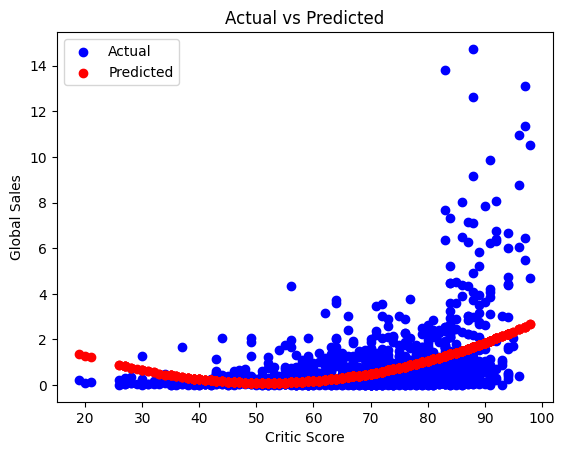

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Вибір певних ознак та цільової змінної
features = ['Critic_Score']
target = 'Global_Sales'

# Видалення рядків з пропущеними значеннями
df1 = df.dropna(subset=features + [target])

# Розділення даних на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(df1[features], df1[target], test_size=0.2, random_state=42)

# Перетворення ознак на поліноміальні ознаки
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Побудова та тренування моделі поліноміальної регресії
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Прогнозування на тестовому наборі
y_pred = model.predict(X_test_poly)

# Оцінка моделі
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Візуалізація результатів
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Critic Score')
plt.ylabel('Global Sales')
plt.legend()
plt.title('Actual vs Predicted')
plt.show()

In [17]:
# Приклад використання моделі для прогнозування
new_data = pd.DataFrame({'Critic_Score': [80, 75, 85]})
new_data_poly = poly_features.transform(new_data)
predicted_sales = model.predict(new_data_poly)
print(predicted_sales)

[1.05989441 0.75098219 1.42840118]


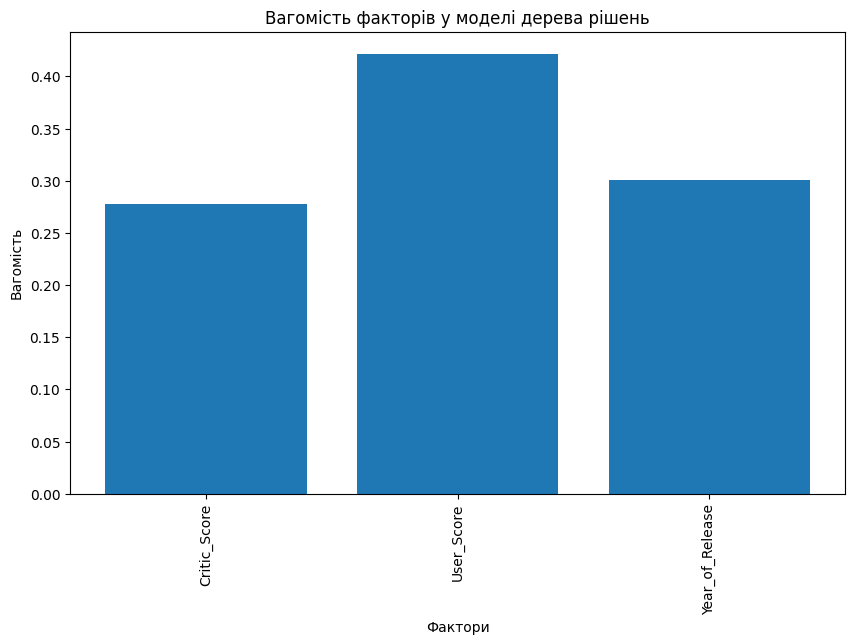

In [18]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Вибір певних ознак та цільової змінної
features = ['Critic_Score', 'User_Score', 'Year_of_Release']
target = 'Global_Sales'

# Видалення рядків з пропущеними значеннями
df1 = df.dropna(subset=features + [target])

# Розділення даних на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(df1[features], df1[target], test_size=0.2, random_state=42)

# Створення та навчання моделі дерева рішень
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Визначення вагомості кожного фактора
importances = model.feature_importances_

# Визначення назв факторів
feature_names = features

# Створення графіку вагомості факторів
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), importances)
plt.xticks(range(len(feature_names)), feature_names, rotation='vertical')
plt.xlabel('Фактори')
plt.ylabel('Вагомість')
plt.title('Вагомість факторів у моделі дерева рішень')
plt.show()


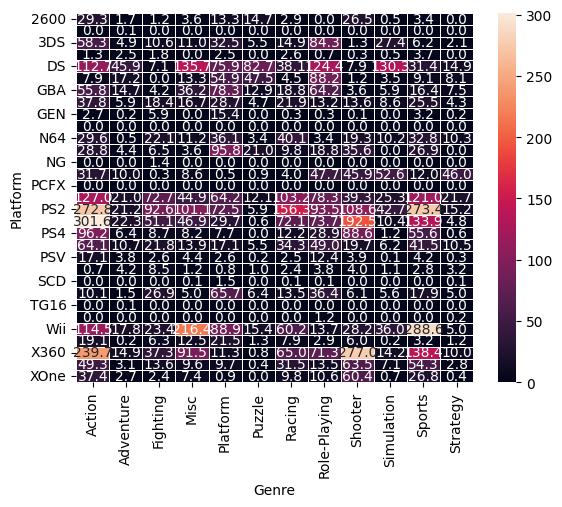

In [19]:
platform_genre_sales = df.pivot_table(
                        index='Platform',
                        columns='Genre',
                        values='Global_Sales',
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5);

In [31]:
import numpy as np
df = df.dropna(subset=['Critic_Score', 'Global_Sales'])
# Обчислення коефіцієнта кореляції
correlation = np.corrcoef(df['Critic_Score'], df['Global_Sales'])[0, 1]

print(f"Кореляція між оцінкою критиків і продажами: {correlation:.2f}")

Кореляція між оцінкою критиків і продажами: 0.24


<ipython-input-33-42de50420c72>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


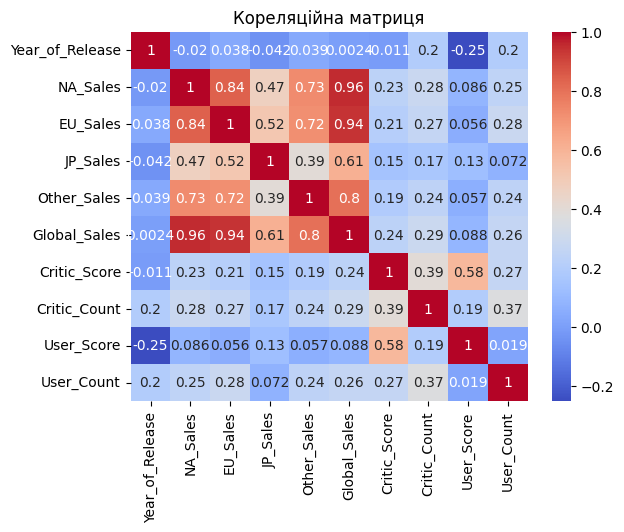

In [33]:
# Кореляційна матриця
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Кореляційна матриця')
plt.show()